In [4]:
# import numpy package for arrays and stuff
import numpy as np
# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt
# import pandas for importing csv files
import pandas as pd
#Seaborn is a Python library for creating statistical data visualizations.
import seaborn as sns
#importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [8]:
from google.colab import files
uploaded = files.upload()



Saving diabetes.csv to diabetes (1).csv


In [9]:
import io
data = pd.read_csv(io.BytesIO(uploaded['diabetes (1).csv']))
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
#getting the information of this data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#getting the header of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#the creates a Pandas DataFrame object named df and assigns it the data
df = pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:

#spliting the data into features (X) and target variable (y)
x= data.drop('Outcome', axis=1)
y = data['Outcome']
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
#splitting the dataset into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 25)


In [22]:
from sklearn.tree import DecisionTreeClassifier
#This line creates a decision tree classification model object in Python using scikit-learn.
clf =DecisionTreeClassifier()

In [23]:
#creates and trains a decision tree classification model using scikit-learn.
clf = DecisionTreeClassifier(random_state = 25)
#htis line fits the training data to the decision tree classification model clf.
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=25)

In [25]:
# making predictions on the testing set
y_pred = clf.predict(x_test)
print(y_pred)


[1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 0 1]


In [26]:
# this command returns the confusion matrix which was assigned to the variable conf_mat
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[159  44]
 [ 45  60]]


In [27]:
from sklearn.metrics import classification_report
#this line gives the classification report of the data which contains accuracy and precision etc..
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       203
           1       0.58      0.57      0.57       105

    accuracy                           0.71       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.71      0.71      0.71       308



<function matplotlib.pyplot.show(close=None, block=None)>

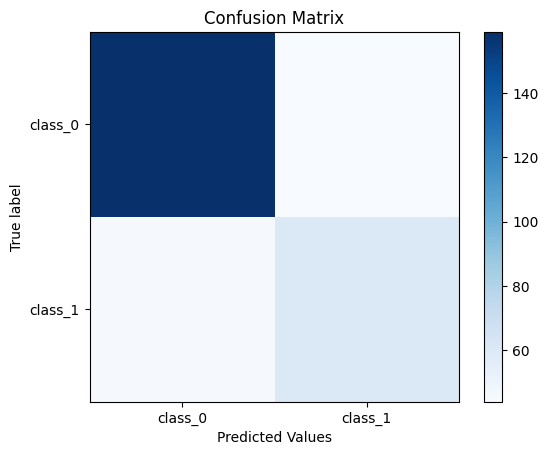

In [28]:
#visualizing the confusion matrix
#This line creates a heatmap visualization of the confusion matrix stored in the variable conf_mat
#imshow is the function from Matplotlib used to display an image.
#The parameter interpolation specifies the type of interpolation used to scale the image data when displaying it on the plot. Here, 'nea
plt.imshow(conf_mat, interpolation ='nearest', cmap = plt.cm.Blues)
#This line adds a colorbar to the plot, which helps interpret the color scale used in the heatmap visualization.
plt.colorbar()
#This line sets the tick labels for the x-axis of the plot.
plt.xticks([0, 1], ['class_0', 'class_1'])
#This line sets the tick labels for the y-axis of the plot.
plt.yticks([0, 1], ['class_0', 'class_1'])
#gives the title of the plot
plt.title("Confusion Matrix")
# shows the x label of the plot
plt.xlabel("Predicted Values")
#shows the y label of the plot
plt.ylabel("True label")
plt.show

In [29]:
#DTC function allows you to create and train a decision tree classification model.
# export graphviz function helps you export a trained decision tree model as a DOT language graph, which can then be visualized using to
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#importing of library
import graphviz

In [30]:
#feature name list contains strings that represent the names or labels for each feature (column) in dataset.
feature_names = ['Pregnancies','BloodPressure', 'SkinThickness','Insulin', 'DiabetesPedigreeFunction','Age', 'outcome']
#This list contains strings that represent the names or labels for the target classes
#0': Represents the class where the outcome is not diabetic.
#'1': Represents the class where the outcome is diabetic.
class_names = ['0', '1']

<function matplotlib.pyplot.show(close=None, block=None)>

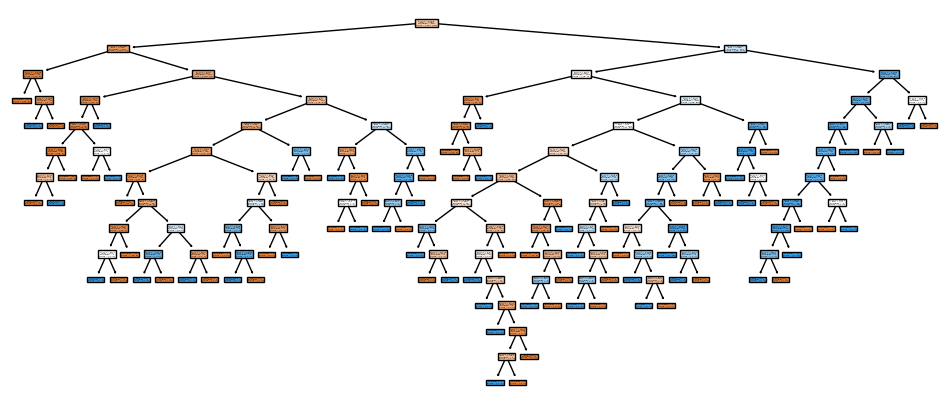

In [31]:
from sklearn import tree
plt.figure(figsize=(12, 5))
#this command utilizes the plot_tree function from the tree module to create a visual representation of the decision tree model stored i
#filled = true: parameter sets the style of the decision tree nodes. By setting it to True, the nodes will be filled with color, which c
tree.plot_tree(clf, filled=True);
plt.show